# Лабораторная работа 4.5.2 "Интерференция лазерного излучения"

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sc
from matplotlib.ticker import MultipleLocator

### 1. Нулевая разность хода. Строим видимость: $\nu_3 = f(\beta)$

При $\nu_2 = 1$ имеем:  
$\boxed{\nu_3 = \cfrac{\nu}{\nu_1}}$

$\boxed{\nu_1 = \cfrac{2 \sqrt{\delta}}{1 + \delta}}$

$\boxed{\delta = \cfrac{h_1}{h_2}}$

$\boxed{\nu = \cfrac{h_4 - h_3}{h_4 + h_3}}$

Теперь считаем данные:

In [2]:
df_1 = pd.read_csv('exper1.csv')

In [3]:
df_1

,beta,h1,h2,h3,h4
0,73,0.30,1.9,1.80,2.80
1,83,0.55,1.9,2.15,3.00
2,93,0.70,1.9,2.20,3.30
3,103,1.65,1.9,2.30,4.80
4,113,1.50,1.9,1.75,5.00
5,123,1.90,1.9,1.60,5.85
6,133,2.00,1.9,1.30,6.40
7,143,2.70,1.7,1.55,7.20
8,153,2.55,1.7,1.25,7.25
9,163,2.35,1.7,1.10,7.20


Поставим в формулы выше все значения:

In [4]:
df_1['delta'] = df_1['h1']/df_1['h2']
df_1['nu_1'] = 2*np.sqrt(df_1['delta'])/(1+df_1['delta'])
df_1['nu'] = (df_1['h4'] - df_1['h3'])/(df_1['h4'] + df_1['h3'])
df_1['nu_3'] = df_1['nu']/df_1['nu_1']
df_1['beta_rad'] = df_1['beta']*np.pi/180

Сначала посмотрим, как оно выглядит. Нанесем точки $\nu_3$ и $\beta$

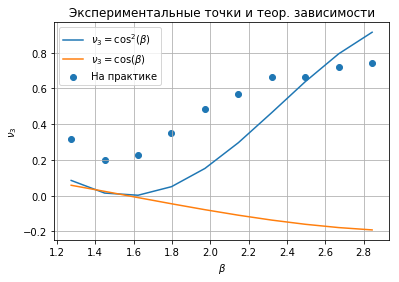

In [5]:
fig, ax = plt.subplots()
ax.scatter(df_1['beta_rad'], df_1['nu_3'], label=r'На практике')
ax.plot(df_1['beta_rad'], np.cos(df_1['beta_rad'])**2, label=r'$\nu_3 = \cos^2(\beta)$')
ax.plot(df_1['beta_rad'], 0.2*np.cos(df_1['beta_rad']), label=r'$\nu_3 = \cos(\beta)$')

ax.grid(which='major')
ax.set_xlabel(r'$\beta$')
ax.set_ylabel(r'$\nu_3$')
ax.set_title(r'Экспериментальные точки и теор. зависимости')
ax.legend()
fig.savefig('exp1-1.pdf')

Посмотрим на зависимость $\nu_3 = \cos^2(\beta)$ поближе:

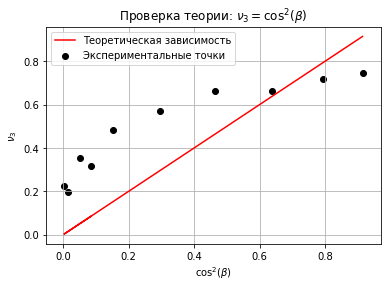

In [6]:
fig, ax = plt.subplots()
x_range = np.cos(df_1['beta_rad'])**2
ax.scatter(x_range, df_1['nu_3'], label=r'Экспериментальные точки', c='black')
# Истинная зависимость
ax.plot(x_range, x_range, label=r'Теоретическая зависимость', c='r')

ax.set_title(r'Проверка теории: $\nu_3 = \cos^2(\beta)$')
ax.set_ylabel(r'$\nu_3$')
ax.set_xlabel(r'$\cos^2(\beta)$')
ax.grid(which='major')
ax.legend()
fig.savefig('exp1-2.pdf')

Достаточно неплохо работает зависимость $\nu_3 = \cos^2(\beta)$. Похоже, что поляризация _круглая_ (вопрос Вове)

### 2. Разность хода меняется. $\beta = 0, ~ \nu_3 = 1$

При $\nu_3 = 1$ имеем:  
$\nu_2(l) = \cfrac{\nu}{\nu_1}$

Считаем данные:

In [7]:
df_2 = pd.read_csv('exper2.csv')

In [8]:
df_2.head()

,x,h1,h2,h3,h4
0,16,2.35,1.75,1.05,6.85
1,18,1.95,2.15,1.45,6.65
2,20,3.25,2.20,4.90,6.10
3,22,0.05,5.50,5.60,5.90
4,24,1.10,1.65,2.45,3.20


In [9]:
df_2['delta'] = df_2['h1']/df_2['h2']
df_2['nu_1'] = 2*np.sqrt(df_2['delta'])/(1+df_2['delta'])
df_2['nu'] = (df_2['h4'] - df_2['h3'])/(df_2['h4'] + df_2['h3'])
df_2['nu_2'] = df_2['nu']/df_2['nu_1']

Посмотрим, что там для $\nu_2 = f(x)$:

In [10]:
def draw_graph2(df, number=None):
    fig, ax = plt.subplots()
    ax.scatter(df['x'], df['nu_2'], label=r'На практике')

    ax.set_title(r'$\nu_2 = f(x)$')
    ax.set_xlabel(r'x, см')
    ax.set_ylabel(r'$\nu_2$')
    ax.grid(which='major')
    if number is not None:
        fig.savefig('exp2-{}.pdf'.format(number))

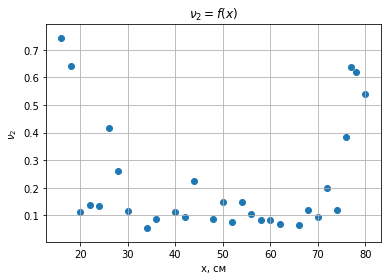

In [11]:
draw_graph2(df_2)

Видим, что есть три плохие точки в окрестности 20. Выкинем их:

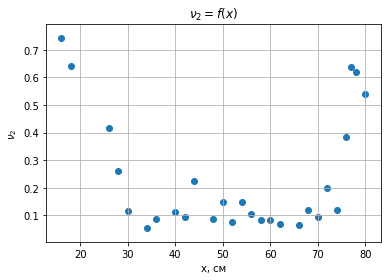

In [12]:
bad_dots = [20, 22, 24]
df_2_fixed = df_2[~df_2['x'].isin(bad_dots)]
draw_graph2(df_2_fixed, 1)

Видим по графику, что расстояние между максимумами составляет:  
$L = 2\cdot(66 - 34) ~\text{см} = 64$ см

Посмотрим на график. Расстояние, при котором видимость падает в два раза, есть:  
$l_{1/2} = 2 \cdot (28 - 16) ~\text{см} = 24$ см

По формуле:  
$\Delta \nu_\text{полн} \approx 0.6~\cfrac{c}{l_\text{1/2}} = 750$ МГц  
$\Delta F = 750$ МГц

Число мод:  
$n \approx 1 + 1.2~\cfrac{L}{l_\text{1/2}} = [4.2] = 4$  
$n = 4$

$$
l_\text{1/2} = 24~\text{см} \\
\Delta F = 750~\text{МГц} \\
n = 4
$$